In [366]:
# imports
from sklearn.datasets import fetch_mldata
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math

In [367]:
# obter o dataset
mnist = fetch_mldata('MNIST original')

In [464]:
# utils
ZOOM = 0.5

cmaps = {
    0: 'Reds',
    1: 'Accent',
    2: 'OrRd',
    3: 'YlOrBr',
    4: 'Purples',
    5: 'Paired',
    6: 'Oranges',
    7: 'Wistia',
    8: 'Blues',
    9: 'Greens'
}
def plot_single(index, ax, x, y, zoom):
    label = int(mnist.target[index])
    array_img = np.reshape((mnist.data[index]), (28, 28))
    array_img = np.ma.masked_where(array_img == 0, array_img)
    img = OffsetImage(array_img, zoom=zoom, cmap=cmaps[label])
    ab = AnnotationBbox(img, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)
    
def plot(coords, indexes, perplexity, samples):    
    x_min = x_max = y_min = y_max = 0
    fig, ax = plt.subplots(figsize=(20, 20))
    for i, index in enumerate(indexes):
        x, y = coords[i]
        plot_single(index, ax, x, y, ZOOM)
        
        x_min = min(x, x_min)
        x_max = max(x, x_max)
        y_min = min(y, y_min)
        y_max = max(y, y_max)
    
    ax.set_xbound(x_min, x_max)
    ax.set_ybound(y_min, y_max)
    ax.axis('off')
    ax.set_title('Perplexity: %d - Samples: %d' % (perplexity, samples), fontsize=20)
    
    return ax

In [466]:
# TSNE
SAMPLES = 1000
PERPLEXITY = 70

tsne_operation = TSNE(n_components=2, 
                      perplexity=PERPLEXITY,
                      n_iter=5000,
                      n_iter_without_progress=300)

# escolhe samples aleatórios do vetor
indexes = np.random.randint(mnist.data.shape[0], size=SAMPLES)
randomized_samples = mnist.data[indexes, :]
tsne_mnist = tsne_operation.fit_transform(randomized_samples)

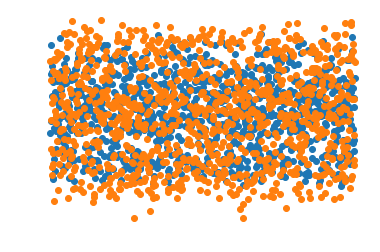

In [467]:
plt.plot(tsne_mnist, 'o')
plt.axis('off')
plt.show()

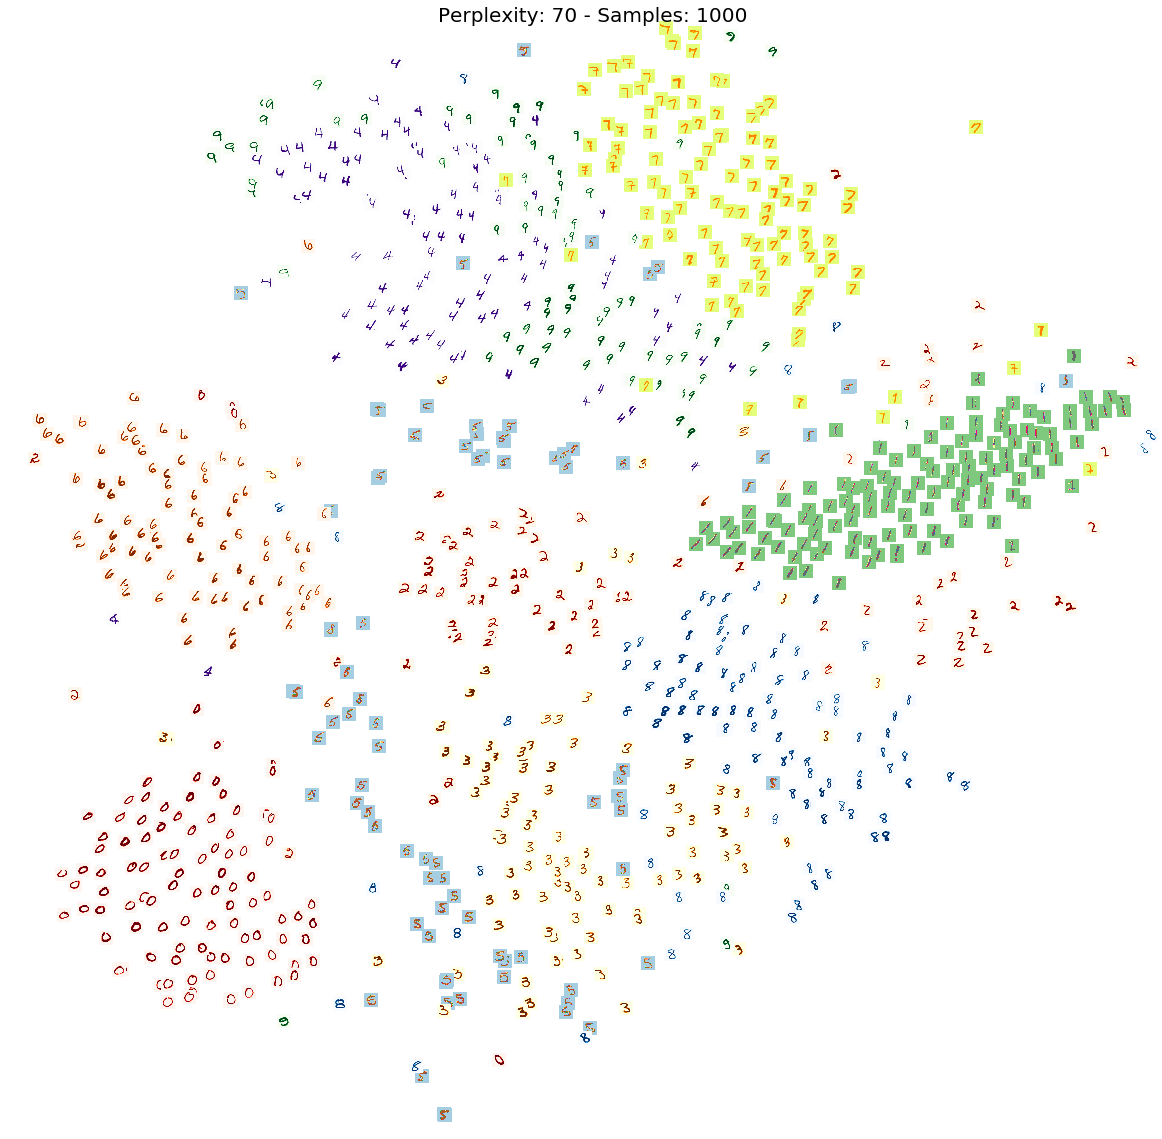

In [468]:
ax = plot(tsne_mnist, indexes, PERPLEXITY, SAMPLES)
plt.show()